In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from solver import parse_input_and_solve
from logger import Logger

In [3]:
import multiprocessing as mp
import concurrent.futures
from itertools import product

In [11]:
def run_tests():
    test_cases = [
        'ks_30_0',
        'ks_40_0',
        'ks_45_0',
        'ks_4_0',
#         'ks_50_0',
#         'ks_50_1',
#         'ks_60_0',
#         'ks_82_0',
#         'ks_100_0',
#         'ks_100_1',
#         'ks_100_2',
#         'ks_106_0',
#         'ks_200_0',
#         'ks_200_1',
#         'ks_300_0',
#         'ks_400_0',
#         'ks_500_0',
#         'ks_1000_0',
#         'ks_10000_0'
    ]
    search_strategies = ["best_first_bb", "lds_bb", "naive_dp"]
    estimation_methods = ["feasible_greedy_estimate"]
    orders = ["descending_value_density"]
    epsilons = [0.01]
    main_logger = {}
    with concurrent.futures.ProcessPoolExecutor(mp.cpu_count()*2) as executor:
        futures = {
            executor.submit(
                parse_input_and_solve,
                file_location="/mnt/c/Users/Shreyas/Desktop/Projects/discrete_optimization/knapsack/data/"+test,
                search_strategy=search_strategy,
                estimation_method=estimation_method,
                order=order,
                epsilon=epsilon,
                debug=False
            ): (test, search_strategy, estimation_method, order, epsilon)
            for test, search_strategy, estimation_method, order, epsilon in product(
                test_cases, search_strategies, estimation_methods, orders, epsilons
            )
        }
        for future in concurrent.futures.as_completed(futures):
            output, logger = future.result()
            print("Completed ", futures[future])
            main_logger.update(logger.log)
    Logger.plot_log(main_logger, search_strategies, estimation_methods, log_scale_x_axis=True)
    return main_logger

Completed  ('ks_30_0', 'best_first_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_45_0', 'best_first_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_40_0', 'best_first_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_4_0', 'best_first_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_4_0', 'lds_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_40_0', 'naive_dp', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_30_0', 'naive_dp', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_4_0', 'naive_dp', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_30_0', 'lds_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_45_0', 'lds_bb', 'feasible_greedy_estimate', 'descending_value_density', 0.01)
Completed  ('ks_40_

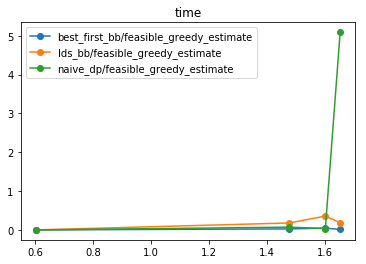

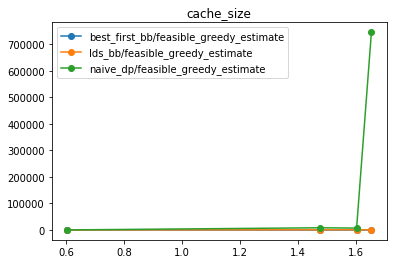

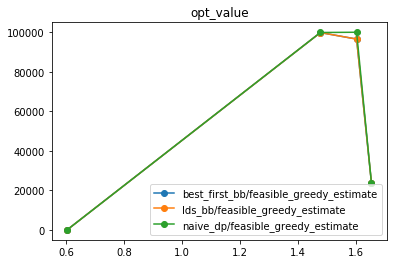

In [12]:
main_logger = run_tests()